In [10]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.xinwei_fdnc.formatting import zimmer2physical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
all_tracklets = project_data.df_all_tracklets

# Load the stage position, and add to a tracklet

In [4]:
stage_pos = pd.read_csv('/project/neurobiology/zimmer/wbfm/dat/ZIM2051/2021-03-04_16-07-57_worm3_ZIM2051/2021-03-04_16-17-30_worm3_ZIM2051-TablePosRecord.txt')

In [6]:
# Units are mm
stage_pos.head()

,time,X,Y
0,16:17:31.662,1.1376,-2.2175
1,16:17:31.678,1.1378,-2.2184
2,16:17:31.678,1.1381,-2.2192
3,16:17:31.678,1.1384,-2.2201
4,16:17:31.694,1.1387,-2.2210


In [40]:
# Downsample to match the frame rate
frames_per_volume = project_data.project_config.config['dataset_params']['num_slices']
# num_volumes = project_data.project_config.config['dataset_params']['num_frames']

to_keep = np.arange(1499*frames_per_volume, step=frames_per_volume)

stage_pos_fps = stage_pos.iloc[to_keep]
stage_pos_fps.shape

(1499, 3)

In [43]:
# Convert space

stage_pos_fps_um = stage_pos_fps[['X', 'Y']] * 1000

In [44]:
stage_pos_fps_um.head()

,X,Y
0,1137.6,-2217.5
32,1141.3,-2248.3
64,1132.9,-2282.0
96,1124.0,-2310.8
128,1110.2,-2356.5


# Get a known good tracklet, and plot in local vs. physical space

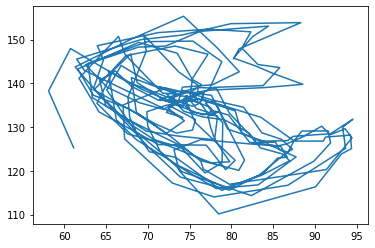

In [66]:
# tracklet_candidate = 'neuron9010'
tracklet_candidate = 'neuron3864'
this_tracklet = all_tracklets[tracklet_candidate]

coords = ['z', 'x', 'y']

zxy = zimmer2physical(this_tracklet[coords].to_numpy())
z1, x1, y1 = zxy[:, 0], zxy[:, 1], zxy[:, 2]

tracklet_candidate = 'neuron5501'
this_tracklet = all_tracklets[tracklet_candidate]

coords = ['z', 'x', 'y']

zxy = zimmer2physical(this_tracklet[coords].to_numpy())
z2, x2, y2 = zxy[:, 0], zxy[:, 1], zxy[:, 2]

plt.plot(x, y)

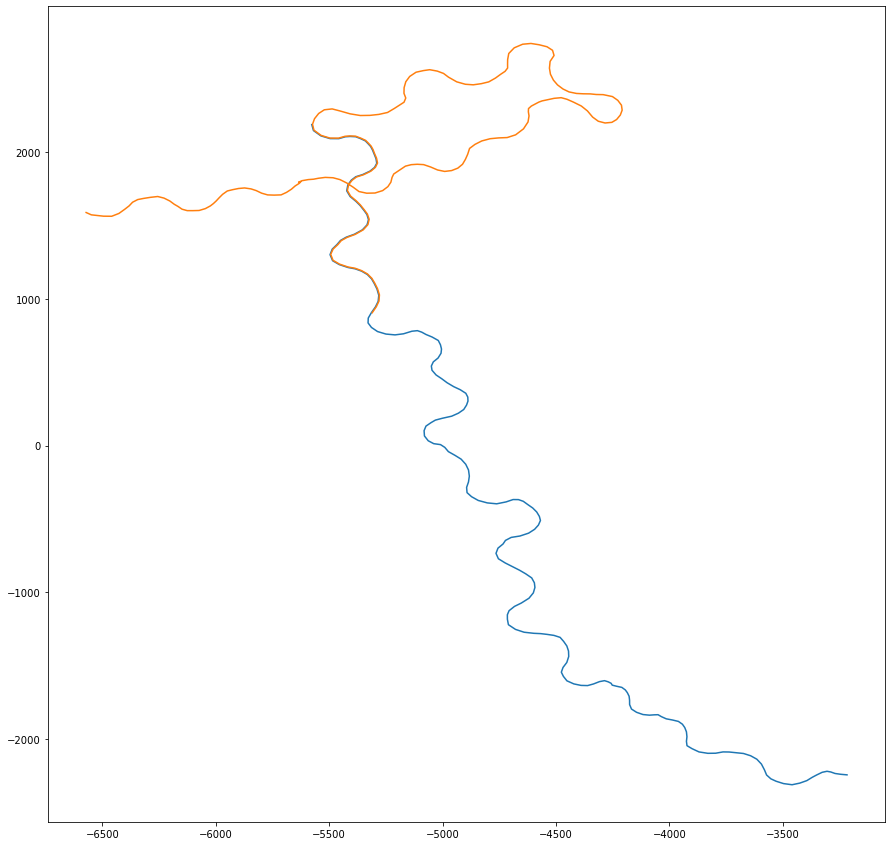

In [67]:
z, x, y = zxy[:, 0], zxy[:, 1], zxy[:, 2]

x_global1 = x1 + stage_pos_fps_um['X']
y_global1 = y1 + stage_pos_fps_um['Y']
x_global2 = x2 + stage_pos_fps_um['X']
y_global2 = y2 + stage_pos_fps_um['Y']

plt.figure(figsize=(15, 15))
plt.plot(x_global1, y_global1)
plt.plot(x_global2, y_global2)

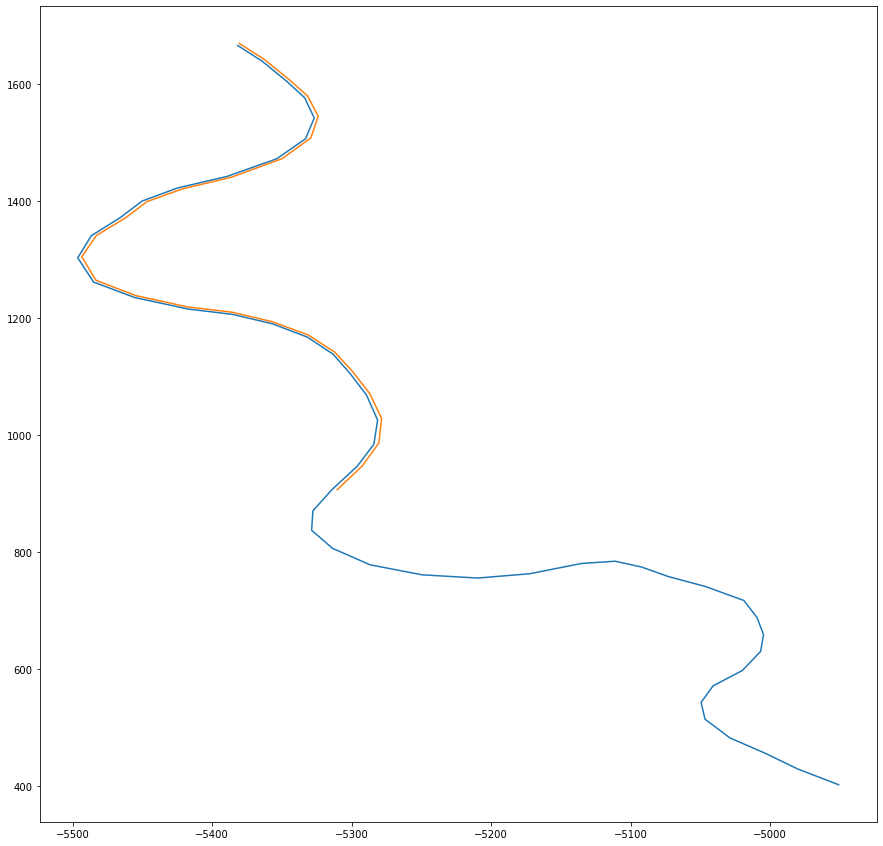

In [69]:

plt.figure(figsize=(15, 15))
plt.plot(x_global1[450:500], y_global1[450:500])
plt.plot(x_global2[450:500], y_global2[450:500])